In [1]:
import sys
sys.path.append('../../../../../')

#### Local Plotting Tools ####
from plot_tools.fig_preamble import *
from plot_tools.plot_helper_funcs import cm2inch

#### Matplotlib & Numpy ####
import numpy as np
import matplotlib as mpl
mpl.rc('font', size=8)
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.gridspec as gridspec

############ Saving Commands #########

ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_'
figname='QIF'

############ Load Data #########
norm_z_states_ = np.load(datapath+'QIF_BayesPredRisk_v_OverSampl_v0_.npz')['norm_z_states_']
n_predict = 50
num = 2050
n_train = 2000

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


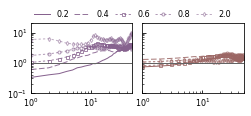

In [2]:
#labels = [r'QKF(True $\Phi)$', r'QKF(AKF $\Phi$)', r'']
color = [COLOURDICT['QKF'], COLOURDICT['AKF']] # By algorithm
figstyl = ['-', '--', 's:', 'o:', 'd:']  # By regime 
case_ratios = [0.2, 0.4, 0.6, 0.8, 2.0]

gs = gridspec.GridSpec(1, 2,
                       left=0.11, right=0.985, 
                       top=0.85, bottom=0.15, 
                       wspace=0.1, hspace=0.2)

fig = plt.figure(figsize=(cm2inch(8.6),cm2inch(3.5)))
ax_0 = fig.add_subplot(gs[0, 0])
ax_1 = fig.add_subplot(gs[0, 1])



for idx_algo in xrange(2):
    
    for idx_q_regime in xrange(len(norm_z_states_)):
        
        alpha_gradient = 1.0 - 0.12*idx_q_regime
        
        vars()['ax_'+str(idx_algo)].plot(np.arange(0, n_predict, 1), 
                                   norm_z_states_[idx_q_regime][idx_algo][n_train : num : 1], 
                                   figstyl[idx_q_regime], 
                                   label=case_ratios[idx_q_regime], 
                                   c=color[idx_algo],
                                   markeredgecolor=color[idx_algo],
                                   alpha=alpha_gradient,
                                   markerfacecolor="None", ms=3,lw=1)
        
    vars()['ax_'+str(idx_algo)].margins(0.2)
    vars()['ax_'+str(idx_algo)].set_yscale('log')
    vars()['ax_'+str(idx_algo)].set_xscale('log')
    vars()['ax_'+str(idx_algo)].axhline(1.0,  color=COLOURDICT['DATA'], lw=prediczero_lw, alpha=1.0)
    #vars()['ax_'+str(idx_algo)].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    #vars()['ax_'+str(idx_algo)].yaxis.set_minor_formatter(FormatStrFormatter('%.0f'))   
    vars()['ax_'+str(idx_algo)].tick_params(direction='in', which='both')
    vars()['ax_'+str(idx_algo)] = set_font_sizes(vars()['ax_'+str(idx_algo)], fsize, Fsize)
    vars()['ax_'+str(idx_algo)].yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=2))
    vars()['ax_'+str(idx_algo)].set_ylim([0.1, 20])
    vars()['ax_'+str(idx_algo)].set_xlim([1, 50])

#ax_0.set_ylabel(r'$\langle (f_n -\hat{f_n})^2 \rangle_D$')
ax_1.set_yticklabels('')
# ax_0.set_ylim([0.6,3.0])
ax_0.legend(loc=3,  fontsize=fsize, frameon=False, bbox_to_anchor=(0., 1.02, 2., .102), 
                     ncol=5, mode="expand", borderaxespad=0.)
fig.savefig(savefig+figname+'.svg', format='svg', dpi=800)
plt.show()